# **About**
<br>**The Sparks Foundation**<br>
<br>**Data Science And Business Analytics Internship November 2021**<br>
<br>**Yashraj Bharambe**<br>
<br>**gripnovember2021**<br>
<br>**Prediction Using Supervised ML**<br>
<br>**Task 1 : Predict percentage of an student based on the no. of study hours**<br>

**Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

**Information about data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Showing first five entries**

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking if there any null value in data**

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Checking for duplicate values**

In [6]:
data.duplicated().sum()

0

**Some basics stats of data**

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
X = data[['Hours']].values
Y = data[['Scores']].values

In [9]:
plt.style.use('seaborn-darkgrid')

**There is no null value in the Dataset so, we can now visualize our Data.**

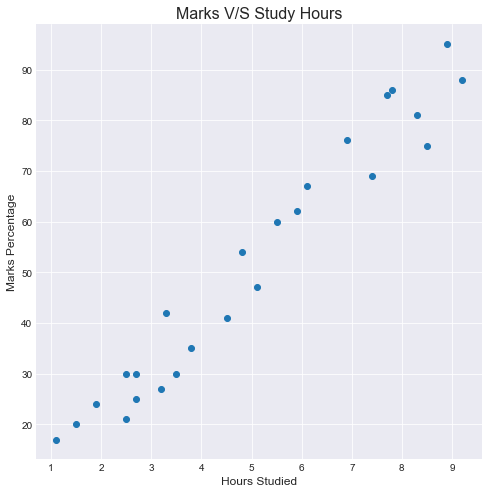

In [10]:
plt.figure(figsize = (8,8))
plt.scatter(X, Y)
plt.title('Marks V/S Study Hours', size = 16)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

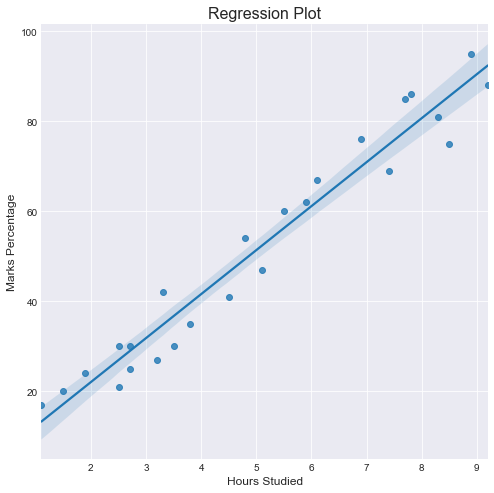

In [11]:
plt.figure(figsize = (8,8))
sns.regplot(x = data['Hours'], y = data['Scores'])
plt.title('Regression Plot', size = 16)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

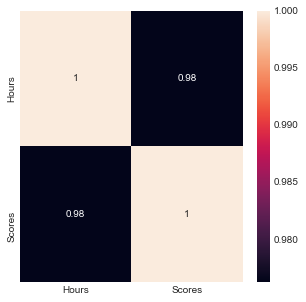

In [13]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(), annot = True)

From the above heatmap it is confirmed that the variables are positively correlated.

**Training the model**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

**Checking rows and columns of train and test data**

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17, 1)
(8, 1)


In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

**Model is trained**

In [17]:
reg.coef_

array([[9.78856669]])

In [18]:
reg.intercept_

array([2.37081538])

**Regression Score of train data**

In [19]:
reg.score(x_train,y_train)

0.9484997422695115

**Regression score of test data**

In [20]:
reg.score(x_test, y_test)

0.9568211104435257

**Visualising train and test data**

Text(0, 0.5, 'Scores of Students')

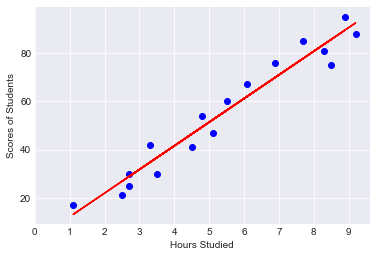

In [21]:
plt.figure()
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.xticks(range(0,10))
plt.xlabel('Hours Studied')
plt.ylabel('Scores of Students')

Text(0, 0.5, 'Scores of Students')

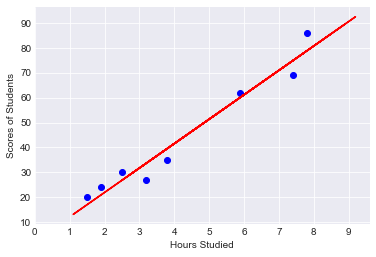

In [22]:
plt.figure()
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.xticks(range(0,10))
plt.xlabel('Hours Studied')
plt.ylabel('Scores of Students')

**Predicting the marks based on No of hours**

In [23]:
y_pred = reg.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [j for j in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,[17.05366541246545]
1,3.2,[33.69422877993883]
2,7.4,[74.80620886428483]
3,2.5,[26.8422320992145]
4,5.9,[60.12335883416126]
5,3.8,[39.56736879198826]
6,1.9,[20.96909208716507]
7,7.8,[78.72163553898443]


**Comparing Actual marks with Predicted Marks**

In [24]:
compare_scores = pd.DataFrame({'Actual Marks': [i[0] for i in y_test], 'Predicted Marks': [j for j in y_pred]})
compare_scores

,Actual Marks,Predicted Marks
0,20,[17.05366541246545]
1,27,[33.69422877993883]
2,69,[74.80620886428483]
3,30,[26.8422320992145]
4,62,[60.12335883416126]
5,35,[39.56736879198826]
6,24,[20.96909208716507]
7,86,[78.72163553898443]


**Evaluating the model**

In [25]:
from sklearn.metrics import mean_absolute_error
print(f"The mean absolute error is {mean_absolute_error(y_test,y_pred)}")

The mean absolute error is 4.419727808027652


**The predicted score if student studied for 9.25 hrs/day**

In [26]:
hours = [9.25]
own_pred = reg.predict([hours])
print(f"Predicted score {float(own_pred[0])}")

Predicted score 92.91505723477056
